# HW3

Overall rules:

- Do not split your answers into separate files. All answers must be in a single jupyter notebook. 
- Obtain all required remote data using the appropriate API unless otherwise is specified.
- Refrain from using code comments to explain what has been done. Document your steps by writing appropriate markdown cells in your notebook.
- Avoid duplicating code by copying and pasting it from one cell to another. If copying and pasting is necessary, develop a suitable function for the task at hand and call that function.
- When providing parameters to a function, never use global variables. Instead, always pass parameters explicitly and always make use of local variables.
- Document your use of LLM models (ChatGPT, Claude, Code Pilot etc). Either take screenshots of your steps and include them with this notebook, or give me a full log (both questions and answers) in a markdown file named HW3-LLM-LOG.md.

Failure to adhere to these guidelines will result in a 15-point deduction for each infraction.

In [8]:
import numpy as np
import random
import matplotlib.pyplot as plt

from ucimlrepo import fetch_ucirepo 
from medmnist import RetinaMNIST
from scipy.io import loadmat

## Q1

For this question we are going to use the [Dry Bean Data Set](https://archive.ics.uci.edu/dataset/602/dry+bean+dataset) from UCI.

In [2]:
dry_bean = fetch_ucirepo(id=602) 
X_beans = dry_bean.data.features 
y_beans = dry_bean.data.targets 

1. Use all of the non-ensemble classification algorithms we have seen in this class on this dataset. Compare their accuracy, precision, and recall using an appropriate cross-validation method. Your results must include a time complexity argument, and an error analysis.
2. Use all of the ensemble classification algorithms given in the lectures using both One-vs-Rest and One-vs-One schemes on this dataset, and compare them. Again, your analyses must include time complexity and error bounds.
3. Which of these options and/or models would you use. Explain.

Do not construct multi-class models. Instead, construct binary classifiers for each class and test them individually.

## Q2

For this question, we are going to use one of the [Medical MNIST]() datasets. Specifically, we are going to work with Retine MNIST dataset.

In [3]:
retina_train = RetinaMNIST(download=True, split='train')
retina_test = RetinaMNIST(download=True, split='test')

The RetinaMNIST is based on the DeepDRiD challenge, which provides a dataset of 1,600 retina fundus images. The class variable designates the 5-level grading of diabetic retinopathy severity, encoded as integers from 0 to 4.

In [21]:
np.unique(retina_train.labels.reshape(-1))

array([0, 1, 2, 3, 4], dtype=uint8)

Here is a sample image from the training subset.

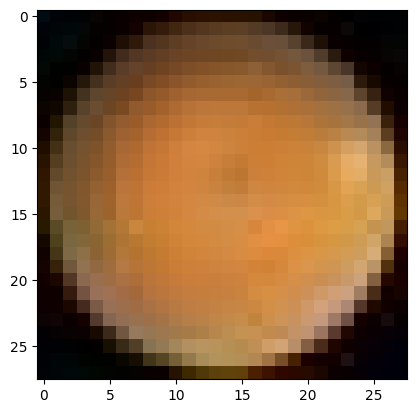

In [4]:
N = retina_train.imgs.shape[0]
plt.imshow(retina_train.imgs[random.randint(0,N)])

Note that in this dataset each picture has a distict label, and your task is to develop supervised models to attach these labels to each picture.

As before:

1. Use all of the non-ensemble classification algorithms we have seen in this class on this dataset. Compare their accuracy, precision, and recall using an appropriate cross-validation method. Your results must include a time complexity argument, and an error analysis.
2. Use all of the ensemble classification algorithms given in the lectures using both One-vs-Rest and One-vs-One schemes on this dataset, and compare them. Again, your analyses must include time complexity and error bounds.
3. Which of these options and/or models would you use. Explain.
   
Again, as before, do not construct multi-class models. Instead, construct binary classifiers for each class and test them individually. You need to train your models on the training set, and cross-validate on the test set.

## Q3

For this question, we are going to use a hyperspectral image from Indian Pines test site in North-western Indiana. I provided the data in class' data folder.

In [27]:
pine_data = loadmat('../data/Indian_pines_corrected.mat')
pine_labels = loadmat('../data/Indian_pines_gt.mat')

The data consists of 145 x 145 pixels over 200 spectral reflectance bands in the wavelength range 0.4–2.5 10^(-6) meters. The Indian Pines scene contains two-thirds agriculture, and one-third forest or other natural perennial vegetation. There are two major dual lane highways, a rail line, as well as some low density housing, other built structures, and smaller roads. Since the scene is taken in June some of the crops present, corn, soybeans, are in early stages of growth with less than 5% coverage. The ground truth available is designated into sixteen classes and is not all mutually exclusive. Each pixel has a label attached to it. There are 16 distinct labels encoded as integers from 1 to 16. 0 means unclassified. The labels are stored in `pine_labels`.

In [25]:
np.unique(pine_labels['indian_pines_gt'].reshape(-1))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16],
      dtype=uint8)

Since this image is a hyperspectral image, each pixel is an integer vector of dimension 200:

In [13]:
pine_data['indian_pines_corrected'].shape

(145, 145, 200)

Here is a random band as a grayscale image together with the **ground truth** where color indicates what type crop is planted.

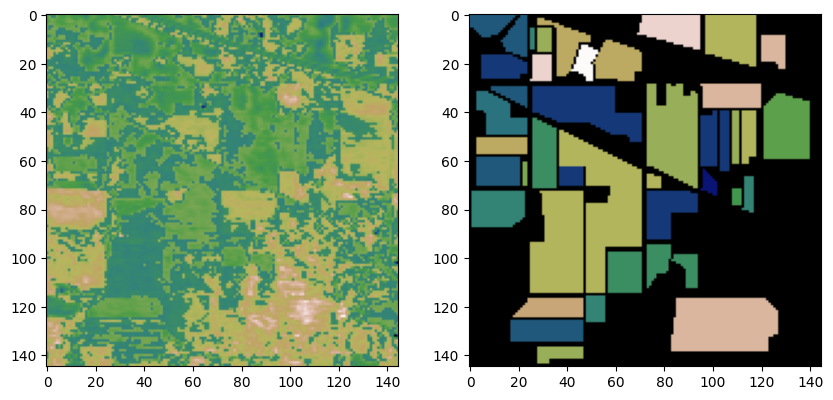

In [26]:
m = np.random.randint(200)
fig, ax = plt.subplots(ncols=2, figsize=(10,8))
ax[0].imshow(pine_data['indian_pines_corrected'][:,:,m], cmap='gist_earth')
ax[1].imshow(pine_labels['indian_pines_gt'], cmap='gist_earth')

The image you see above on the left is a random band depicted as a grayscale image.

Note that in the previous question you needed to classify (label) each image separately. In this question, you need to classify each pixel (as a 200-dimensional vector) separately.

1. Use all of the non-ensemble classification algorithms we have seen in this class on the pixels of this dataset. Compare their accuracy, precision, and recall using an appropriate cross-validation method. Your results must include a time complexity argument, and an error analysis.
2. Use all of the ensemble classification algorithms given in the lectures using both One-vs-Rest and One-vs-One schemes on the pixels, and compare them. Again, your analyses must include time complexity and error bounds.
3. Which of these options and/or models would you use. Explain.
   
Again, as before, do not construct multi-class models. Instead, construct binary classifiers for each class and test them individually. You need to train your models on the training set, and cross-validate on the test set. 